In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
# Loading the dataset
df=pd.read_csv("spam.csv",encoding='latin1')
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


## Exploratory Data analysis:-

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

#### Dropping the last three columns,because that three columns don't have any values useful to build to a model

In [5]:
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

#### Distribution of the target variable
The dataset contains 4825 ham and 747 spam messages.
For both classes, some messages appear more than once (common phrases, etc.)



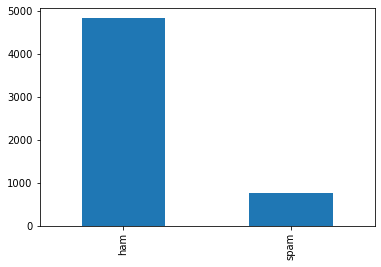

In [7]:
## Visualizing the count of 'spam' messages in the dataset
df.label.value_counts().plot.bar()

#### lets add another coloumn length for storing the length of each message .It will help us to find the lengths of the messages as well as we can compare the length of spam and ham by vizualisation techinques

In [8]:
#Adding a new coloumn "length" to our data frame
df['length'] = df['message'].apply(len,)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Text(0.5, 0, 'Message Length')

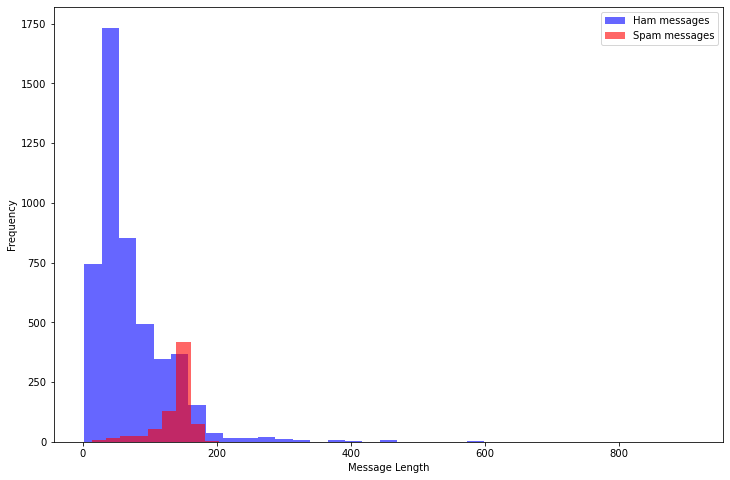

In [9]:
plt.figure(figsize=(12, 8))

df[df.label=='ham'].length.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
df[df.label=='spam'].length.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

### Looks like spam messages are generally longer than ham messages:
Bulk of ham has length below 100, for spam it is above 100.

# Data Cleaning and Preprocessing:-

In [10]:
# Importing essential libraries for performing Natural Language Processing on our dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
corpus = []
ps = PorterStemmer()

In [12]:
for i in range(0,df.shape[0]):

  # removing all the special characters and punctuation from the message 
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.message[i])

  # Converting the entire message into lower case
  message = message.lower()

  # Tokenizing the message because we have to remove the stop words and we have to apply stemming to get the root word
  words = message.split()

  # Removing the stop words for example "a," "and,","or," and "what.
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  message = ' '.join(words)

  # Building a corpus of messages
  corpus.append(message)

In [13]:
corpus[1:10]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

### The raw data cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors so We will use CountVectorizer to "convert text into a matrix of token counts":

In [14]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [15]:
X.shape

(5572, 2500)

In [16]:
# Extracting dependent variable from the dataset
y = pd.get_dummies(df['label'])
y = y.iloc[:, 1].values

In [17]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [18]:
y.shape

(5572,)

In [22]:
# Creating a pickle file for the CountVectorizer
pickle.dump(cv, open('count_vectorizer.pkl', 'wb'))

# Model Building:-

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

###  Training model using Naive bayes classifier


In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.3)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [23]:
# Creating a pickle file for the Multinomial Naive Bayes model
filename = 'spam_message_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

### Predicting the Test set results

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 98.57%
Precision score is: 0.96
Recall score is: 0.95


### Confusion Matrix 

In [28]:
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)

In [29]:
conf_matrix

array([[942,   7],
       [  9, 157]], dtype=int64)